
# проект 

# Анализ рынка игр на игровых консолях

 **Перед нами данные о продажах в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). \
 Цель проекта: Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.**\
### План работы:
1. Открыть таблицу

2. Подготовить данные

3. Провести исследовательский анализ данных**\

   3.1 Посмотрим, сколько игр выпускалось в разные годы.\

   3.2 Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.\

   3.3 Возьмем данные за соответствующий актуальный период.\

   3.4 Посмотрим, какие платформы лидируют по продажам, выберем несколько потенциально прибыльных платформ.\

   3.5 Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.\

   3.6 Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.\

   3.7 Соотнесите выводы с продажами игр на других платформах.\

   3.8 Посмотрим на общее распределение игр по жанрам.\

4. Составим портрет пользователя каждого региона

   Определим для пользователя каждого региона (NA, EU, JP):\

   4.1 Самые популярные платформы (топ-5). Опишите различия в долях продаж.\

   4.2 Самые популярные жанры (топ-5). Поясните разницу.\

   4.3 Влияет ли рейтинг ESRB на продажи в отдельном регионе?\
 
5. Проверим гипотезы:\
   5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;\

   5.2 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.\

я



**Шаг 1. Откройте файл с данными и изучите общую информацию**

Путь к файлу: /datasets/games.csv.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Шаг 2. Подготовьте данные**

2.1.Заменить названия столбцов (приведите к нижнему регистру);

2.2 Преобразовать данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;

2.3.Обработать пропуски при необходимости: 

 2.3.1.Объяснить, почему заполнили пропуски определённым образом или почему не стали это делать;

 2.3.2 Описать причины, которые могли привести к пропускам;

 2.3.3 Обратить внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
2.4 Посчитать суммарные продажи во всех регионах и запишите их в отдельный столбец.

**2.1 Заменим названия столбцов**

In [3]:
data.rename(columns=lambda x: x.lower(), inplace=True)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**2.2 Преобразуйте данные в нужные типы.**\
Year_of_Release поменять на datetime, год выпуска лучше во временном типе данных\
critic_score поменять на int - оценка пользователей это целое чило\
user_score поменять на float - это числовое дроное значение.

In [4]:
#изменим тип данных на datetime
data['year_of_release'] = pd.to_datetime(data['year_of_release'], format='%Y')

In [5]:
#critic_score поменять на int 
data['critic_score'] = data['critic_score'].fillna(-1).astype(int) #пропуски меняем на 0

Мы оставили пропуски в этом столбце, чтобы потом корректно рассчитать оценку

**рейтинг TBD - To Be Determined означает, что он не определён, то же самое, что и пропуск. Меняем значения на NaN**

In [6]:
data['user_score'] = data['user_score'].replace('tbd', np.nan)

In [7]:
data['user_score'] = data['user_score'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16713 non-null  object        
 1   platform         16715 non-null  object        
 2   year_of_release  16446 non-null  datetime64[ns]
 3   genre            16713 non-null  object        
 4   na_sales         16715 non-null  float64       
 5   eu_sales         16715 non-null  float64       
 6   jp_sales         16715 non-null  float64       
 7   other_sales      16715 non-null  float64       
 8   critic_score     16715 non-null  int64         
 9   user_score       7590 non-null   float64       
 10  rating           9949 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 1.4+ MB


в этом столбце тоже оставили пропуски, чтоб корректно считать далее оценку пользователей. В столбцах с рейтингом пропуски означают, что игры не оценивали, либо просто не вписали оценку по ошибке.

**2.3 Обработаем пропуски**

как мы видим из общей информации:
пропуски есть в названиях - 2 из 16715 - меньше 2%, удалим эти данные
в годах выпуска - 269 пропуков, это 16% слишком много, чтобы прото удалить.
в жанрах - 2 из 16715, меньше 2%, удаляем эти строки.
в рейтинге - многие игры без рейтинга, возможно, их еще не оценивали. можно заполнить значением NoRaiting.

In [8]:
#удаляем строки с пропусками в столбцах name и genre
data.dropna(subset = ['name'], inplace=True)
data.dropna(subset = ['genre'], inplace=True)
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16713 non-null  object        
 1   platform         16713 non-null  object        
 2   year_of_release  16444 non-null  datetime64[ns]
 3   genre            16713 non-null  object        
 4   na_sales         16713 non-null  float64       
 5   eu_sales         16713 non-null  float64       
 6   jp_sales         16713 non-null  float64       
 7   other_sales      16713 non-null  float64       
 8   critic_score     16713 non-null  int64         
 9   user_score       7590 non-null   float64       
 10  rating           9949 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 1.5+ MB


In [9]:
data['rating'] = data['rating'].fillna('NoRat')
data['rating'].unique()

array(['E', 'NoRat', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

Таблица сократилась менее, чем на 2% - ушли 2 строки, знаит пропуски в именах совпадали с пропуками в жанрах

**Проверим таблицу на дубликаты**

In [10]:
duplicates = data.duplicated()
if duplicates.any():
    print("Таблица содержит дубликаты.")
else:
    print("Таблица не содержит явных дубликатов.")

Таблица не содержит явных дубликатов.


Проверим на неявные дубликаты

In [11]:
columns_to_check = ['name', 'platform', 'year_of_release']
duplicates = data.duplicated(subset=columns_to_check)

duplicate_rows = data[duplicates]

print("Список неявных дубликатов:")
print(duplicate_rows)

Список неявных дубликатов:
                name platform year_of_release   genre  na_sales  eu_sales  \
16230  Madden NFL 13      PS3      2012-01-01  Sports       0.0      0.01   

       jp_sales  other_sales  critic_score  user_score rating  
16230       0.0          0.0            83         5.5      E  


In [12]:
#удалим неявные дубликаты
data.drop_duplicates(subset=columns_to_check, inplace=True)
#проверяем
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16712 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16712 non-null  object        
 1   platform         16712 non-null  object        
 2   year_of_release  16443 non-null  datetime64[ns]
 3   genre            16712 non-null  object        
 4   na_sales         16712 non-null  float64       
 5   eu_sales         16712 non-null  float64       
 6   jp_sales         16712 non-null  float64       
 7   other_sales      16712 non-null  float64       
 8   critic_score     16712 non-null  int64         
 9   user_score       7589 non-null   float64       
 10  rating           16712 non-null  object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 1.5+ MB


**2.4 Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.**

In [13]:
#добавим столбец с общими продажами
data['sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] +  data['other_sales']

**вывод** Мы заменили тип данных на более подходящий в столбцах, удалили строки с пропусками, удалили дубликаты. Заменили пропуски в столбце rating на 'NoRating' - это поможет нам далее корректно провести анализ с рейтингами  игр.

**Шаг 3. Проведите исследовательский анализ данных**

3.1 Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

3.2 Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

3.3 Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

3.4 Не учитывайте в работе данные за предыдущие годы.

3.5 Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

3.6 Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

3.7 Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

3.8 Соотнесите выводы с продажами игр на других платформах.

3.9 Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

**3.1 Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?**

<AxesSubplot:title={'center':'Суммарные продажи игр по годам'}, xlabel='Года выпуска', ylabel='Продажи в млню шт.'>

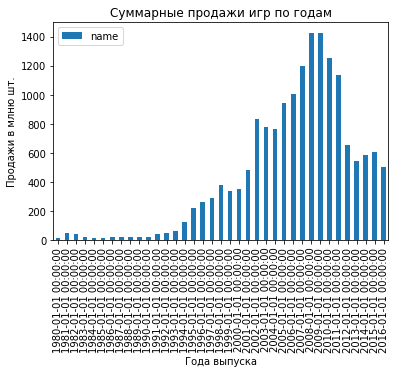

In [14]:
years_pivot = pd.pivot_table(data, index='year_of_release', values='name', aggfunc='count')
years_pivot.plot(kind='bar', title='Суммарные продажи игр по годам', xlabel='Года выпуска', ylabel='Продажи в млню шт.')

**Вывод** Из таблицы видно, что данные до 2002 года не так важны - до 2002 отрасль стремительно росла, а с 2002 рынок игр стал заполненным, данные уже можно сравнивать без проблем.

**3.2 Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?**

In [15]:

#создадим датафрейм с платформами и суммой их продаж
platform_pivot = data.pivot_table(index='platform', values='sales', aggfunc='sum')
platform_pivot = platform_pivot.sort_values('sales', ascending=False)
platform_pivot.head(30)

,sales
platform,
PS2,1255.77
X360,971.42
PS3,939.64
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


Платформы с наибольшими суммарными продажами - возьмем первые 10: PS2, X360, PS3, Wii, DS,PS, GBA,PS4,PSP,PC,3DS. По этим платформам построим распределение по годам

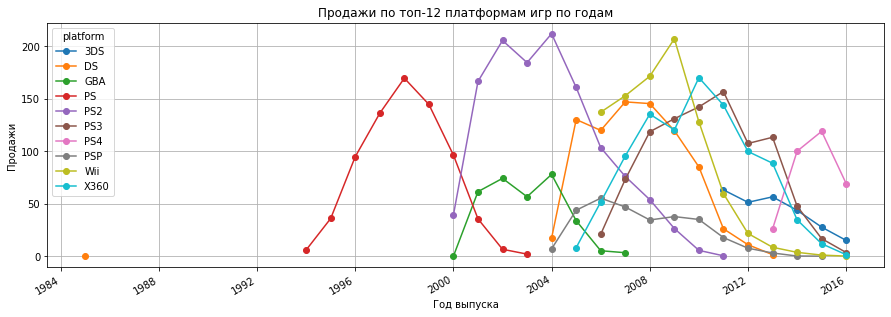

In [16]:
first_data = data.query('platform == ["PS2", "X360", "PS3", "Wii", "DS", "PS", "PS4", "GBA", "PSP", "3DS"]').pivot_table(index = 'year_of_release', columns = 'platform', values = 'sales', aggfunc = 'sum')
first_data.plot(grid = True, figsize = (15,5), style = 'o-', xlabel = 'Год выпуска', ylabel = 'Продажи', label = 'Платформа') 
plt.title('Продажи по топ-12 платформам игр по годам') 
plt.show() 

**вывод** До 2016 дожили только платформы PS4, 3DS, X360, PS3, Wii, PSP. Причем у всех 6 платформ продажи упали, остальные просто прекратили продажи.

**3.3 Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. 
3.4 Не учитывайте в работе данные за предыдущие годы.
3.5 Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.**

актуальный период лучше взять с 2014 года, когда на рынке остались актуальные в 2016 платформы.

In [17]:
years = [2014, 2015, 2016]
actual_data = data[data['year_of_release'].dt.year.isin(years)]
actual_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             1689 non-null   object        
 1   platform         1689 non-null   object        
 2   year_of_release  1689 non-null   datetime64[ns]
 3   genre            1689 non-null   object        
 4   na_sales         1689 non-null   float64       
 5   eu_sales         1689 non-null   float64       
 6   jp_sales         1689 non-null   float64       
 7   other_sales      1689 non-null   float64       
 8   critic_score     1689 non-null   int64         
 9   user_score       888 non-null    float64       
 10  rating           1689 non-null   object        
 11  sales            1689 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(4)
memory usage: 171.5+ KB


посмотрим на продажи по платформам за выбранный период

<AxesSubplot:title={'center':'Продажи по платформам за 3 года'}, xlabel='Платформы', ylabel='Продажи в млн.шт.'>

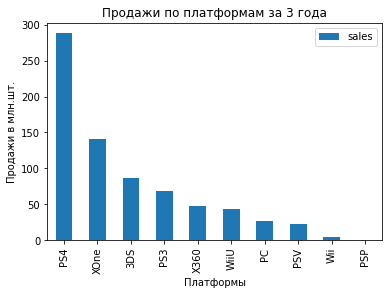

In [18]:
actual_pivot = actual_data.pivot_table(index='platform', values='sales', aggfunc='sum')
actual_pivot = actual_pivot.sort_values('sales', ascending=False)
actual_pivot.plot(kind='bar', title='Продажи по платформам за 3 года', xlabel='Платформы', ylabel='Продажи в млн.шт.')

**Вывод** самые большие продажи у PS4 - 288.15\
XOne на втором метсе - 140.36 - в 2 раза меньше\
3DS - 86.6 - в 3 раза меньше лидера
PS3 - 68.18 - больше, чем в 4 раза меньше продаж, чем у лидера.
Но нужно посмотреть, как ведут себя за последние 3 года эти платформы - возможно, что они только начинают свои продажи, и в следующем году принесут больше выручки.\
построим график по каждой платформе


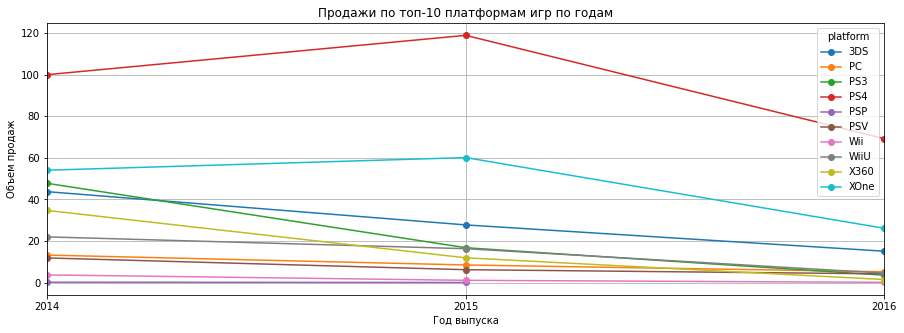

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014-01-01,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015-01-01,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016-01-01,15.14,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


In [19]:
last_data = actual_data.query('platform == ["PS4", "XOne","3DS", "PS3", "X360", "WiiU", "PC", "PSV", "Wii", "PSP"]').pivot_table(index = 'year_of_release', columns = 'platform', values = 'sales', aggfunc = 'sum')
last_data.plot(grid = True, figsize = (15,5), style = 'o-', xlabel = 'Год выпуска', ylabel = 'Объем продаж', label = 'Платформа') 
plt.title('Продажи по топ-10 платформам игр по годам') 
plt.show() 
last_data

**Вывод**Из графика видим, что с маленькими продажами, но не теряя позиций идут платформв Wii, PSV, PS, PSP в 2016 году вообще не продавалась. Не стоит закупать игры на этой платформе в будущем году. Остальные платформы независимо от объёмов продаж просели к 2016 году. Возможно это связано с набором популярности игр не на представленных платформах (в качестве мобильных приложений)

**Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.**

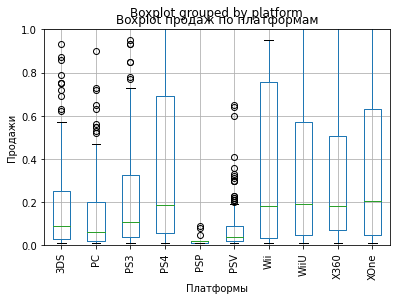

In [20]:
actual_data.boxplot(column='sales', by='platform')
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.title('Boxplot продаж по платформам')
plt.ylim(0,1)
plt.xticks(rotation=90)
plt.show()

**вывод**На графиках видим, что нормальные значения продаж растянулись у разных платформ от 0,01 млн шт до 0,75 млн.шт, медианные значения продаж у платформ Wii, WiiU, X360, XOne, PS4 - около 0,2 млн.шт, у PS3 - 0,1 ,PC - 0,09 , 3DS - 0,08. PSP и PSV маленькие распределения и медианы на 0,01 и 0,02 млн шт за выбранный период.

**3.7 Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.**

Возьмём самую популярную платформу последних 3х лет - PS4
построим диаграмму рассеяния

In [21]:
#удалим из датафрейма значения-заглушки
actual_data_score = actual_data[actual_data['critic_score']!=-1]
actual_data_score = actual_data_score.dropna(subset=['critic_score'])
actual_data_score = actual_data_score.dropna(subset=['user_score'])

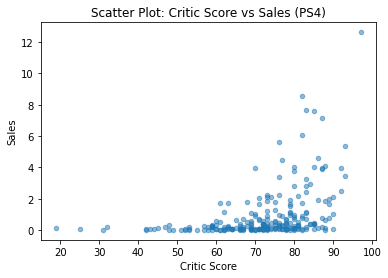

Корреляция Пирсона: 0.40190287811475334


In [22]:
ps4_data = actual_data_score[actual_data_score['platform'] == 'PS4']
ps4_data = ps4_data.dropna(subset=['critic_score'])
ps4_data.plot.scatter(x='critic_score', y='sales', alpha=0.5)
plt.xlabel('Critic Score')
plt.ylabel('Sales')
plt.title('Scatter Plot: Critic Score vs Sales (PS4)')
plt.show()

print('Корреляция Пирсона:', ps4_data['critic_score'].corr(ps4_data['sales']) )

**Вывод** 0,40 - умеренная зависимость есть

построим график рассеяния и узнаем зависимость продаж от оценок пользователей

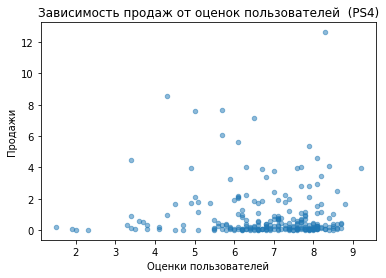

Корреляция Пирсона: -0.04318585997193634


In [23]:
ps4_data = actual_data_score[actual_data_score['platform'] == 'PS4']
ps4_data.plot.scatter(x='user_score', y='sales', alpha=0.5)
plt.xlabel('Оценки пользователей')
plt.ylabel('Продажи')
plt.title('Зависимость продаж от оценок пользователей  (PS4)')
plt.show()

print('Корреляция Пирсона:', ps4_data['user_score'].corr(ps4_data['sales']) )

**3.8 Соотнесите выводы с продажами игр на других платформах.**

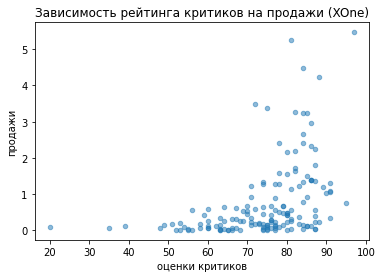

Корреляция Пирсона: 0.42211185105557647


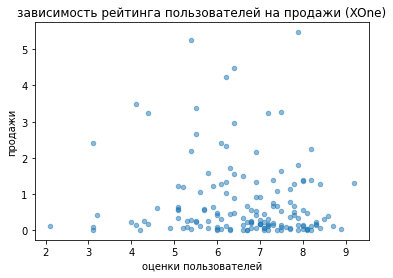

Корреляция Пирсона: -0.0917343450331075


In [24]:
xone_data = actual_data_score[actual_data_score['platform'] == 'XOne']
xone_data.plot.scatter(x='critic_score', y='sales', alpha=0.5)
plt.xlabel('оценки критиков')
plt.ylabel('продажи')
plt.title('Зависимость рейтинга критиков на продажи (XOne)')
plt.show()

print('Корреляция Пирсона:', xone_data['critic_score'].corr(xone_data['sales']) )

xone_data.plot.scatter(x='user_score', y='sales', alpha=0.5)
plt.xlabel('оценки пользователей')
plt.ylabel('продажи')
plt.title('зависимость рейтинга пользователей на продажи (XOne)')
plt.show()

print('Корреляция Пирсона:', xone_data['user_score'].corr(xone_data['sales']))


**вывод** У XOne зависимость от отзывов критиков есть средняя 0,42, от отзывов пользователей поти нет.

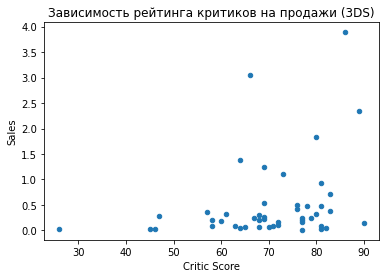

Корреляция Пирсона: 0.28468579095782925


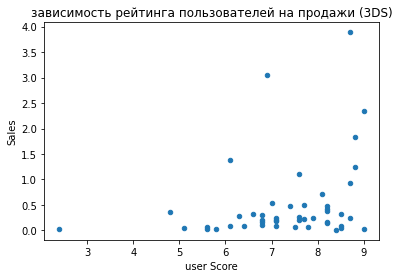

Корреляция Пирсона: 0.2798498792503281


In [25]:
ds_data = actual_data_score[actual_data_score['platform'] == '3DS']

ds_data.plot.scatter(x='critic_score', y='sales')
plt.xlabel('Critic Score')
plt.ylabel('Sales')
plt.title('Зависимость рейтинга критиков на продажи (3DS)')
plt.show()

print('Корреляция Пирсона:', ds_data['critic_score'].corr(ds_data['sales']) )

ds_data.plot.scatter(x='user_score', y='sales')
plt.xlabel('user Score')
plt.ylabel('Sales')
plt.title('зависимость рейтинга пользователей на продажи (3DS)')
plt.show()

print('Корреляция Пирсона:', ds_data['user_score'].corr(ds_data['sales']))


Зависимости от оценок критиков слабая (корр. 0,28), зависимость от оценок пользователей - слабая (0,27).

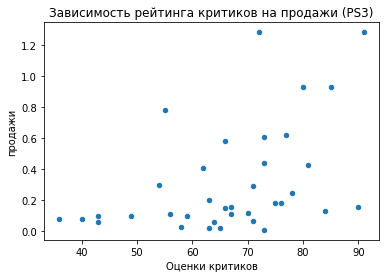

Корреляция Пирсона: 0.44657460493190704


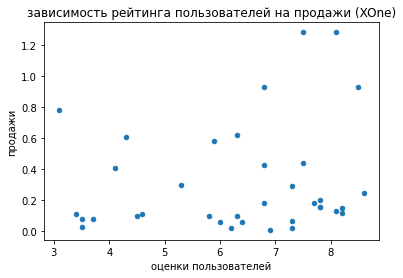

Корреляция Пирсона: 0.15659516181359956


In [26]:
ps3_data = actual_data_score[actual_data_score['platform'] == 'PS3']
ps3_data = ps3_data.dropna(subset=['critic_score'])
ps3_data = ps3_data.dropna(subset=['user_score'])
ps3_data.plot.scatter(x='critic_score', y='sales')
plt.xlabel('Оценки критиков')
plt.ylabel('продажи')
plt.title('Зависимость рейтинга критиков на продажи (PS3)')
plt.show()

print('Корреляция Пирсона:', ps3_data['critic_score'].corr(ps3_data['sales']) )

ps3_data.plot.scatter(x='user_score', y='sales')
plt.xlabel('оценки пользователей')
plt.ylabel('продажи')
plt.title('зависимость рейтинга пользователей на продажи (XOne)')
plt.show()

print('Корреляция Пирсона:', ps3_data['user_score'].corr(ps3_data['sales']))


От оценок критиков - зависимость средняя (0,44), от оценок пользователей - слабая (0,15)

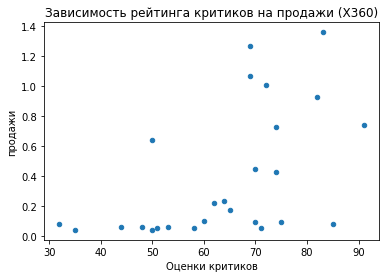

Корреляция Пирсона: 0.42211185105557647


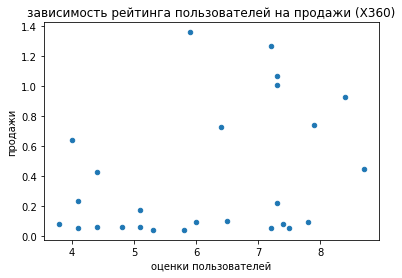

Корреляция Пирсона: 0.33651362483599345


In [27]:
x360_data = actual_data_score[actual_data_score['platform'] == 'X360']
x360_data.plot.scatter(x='critic_score', y='sales')
plt.xlabel('Оценки критиков')
plt.ylabel('продажи')
plt.title('Зависимость рейтинга критиков на продажи (X360)')
plt.show()

print('Корреляция Пирсона:', xone_data['critic_score'].corr(xone_data['sales']) )

x360_data.plot.scatter(x='user_score', y='sales')
plt.xlabel('оценки пользователей')
plt.ylabel('продажи')
plt.title('зависимость рейтинга пользователей на продажи (X360)')
plt.show()

print('Корреляция Пирсона:', x360_data['user_score'].corr(x360_data['sales']))


Зависимость от оценок критиков средняя (0,42), зависимость от оценок пользователей средняя (0,33).

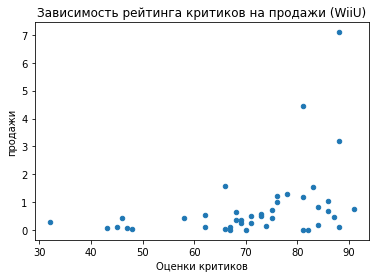

Корреляция Пирсона: 0.42211185105557647


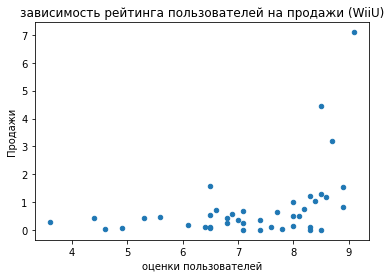

Корреляция Пирсона: 0.4114513876908575


In [28]:
wiiu_data = actual_data_score[actual_data_score['platform'] == 'WiiU']
wiiu_data=wiiu_data.dropna(subset=['critic_score'])
wiiu_data=wiiu_data.dropna(subset=['user_score'])
wiiu_data.plot.scatter(x='critic_score', y='sales')
plt.xlabel('Оценки критиков')
plt.ylabel('продажи')
plt.title('Зависимость рейтинга критиков на продажи (WiiU)')
plt.show()

print('Корреляция Пирсона:', xone_data['critic_score'].corr(xone_data['sales']) )

wiiu_data.plot.scatter(x='user_score', y='sales')
plt.xlabel('оценки пользователей')
plt.ylabel('Продажи')
plt.title('зависимость рейтинга пользователей на продажи (WiiU)')
plt.show()

print('Корреляция Пирсона:', wiiu_data['user_score'].corr(wiiu_data['sales']))


Зависимость от оценок критиков - умеренная (0,42), от оценок пользователей - умеренная(0,41)

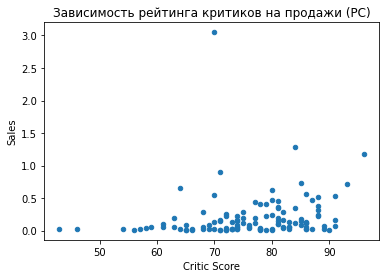

Корреляция Пирсона: 0.17206091490145103


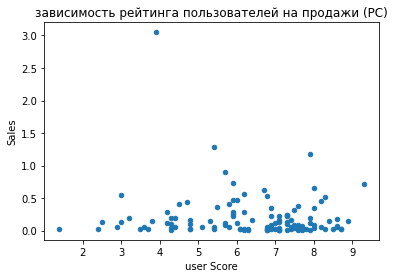

Корреляция Пирсона: -0.08997391228554938


In [29]:
pc_data = actual_data_score[actual_data_score['platform'] == 'PC']
pc_data=pc_data.dropna(subset=['critic_score'])
pc_data=pc_data.dropna(subset=['user_score'])
pc_data.plot.scatter(x='critic_score', y='sales')
plt.xlabel('Critic Score')
plt.ylabel('Sales')
plt.title('Зависимость рейтинга критиков на продажи (PC)')
plt.show()

print('Корреляция Пирсона:', pc_data['critic_score'].corr(pc_data['sales']) )

pc_data.plot.scatter(x='user_score', y='sales')
plt.xlabel('user Score')
plt.ylabel('Sales')
plt.title('зависимость рейтинга пользователей на продажи (PC)')
plt.show()

print('Корреляция Пирсона:', pc_data['user_score'].corr(pc_data['sales']))


Зависимость от оценок критиков слабая, от оценок пользователей - не обнаружена.

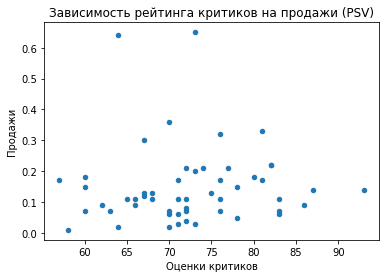

Корреляция Пирсона: 0.04102908974171329


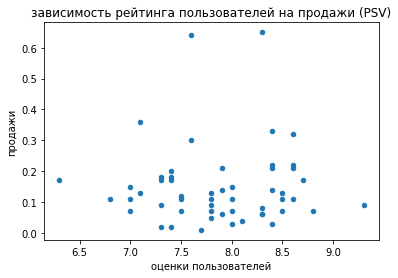

Корреляция Пирсона: 0.023528216599023048


In [30]:
psv_data = actual_data_score[actual_data_score['platform'] == 'PSV']
psv_data.plot.scatter(x='critic_score', y='sales')
plt.xlabel('Оценки критиков')
plt.ylabel('Продажи')
plt.title('Зависимость рейтинга критиков на продажи (PSV)')
plt.show()

print('Корреляция Пирсона:', psv_data['critic_score'].corr(psv_data['sales']) )

psv_data.plot.scatter(x='user_score', y='sales')
plt.xlabel('оценки пользователей')
plt.ylabel('продажи')
plt.title('зависимость рейтинга пользователей на продажи (PSV)')
plt.show()

print('Корреляция Пирсона:', psv_data['user_score'].corr(psv_data['sales']))

Зависимости от оценок критиков и пользователей нет

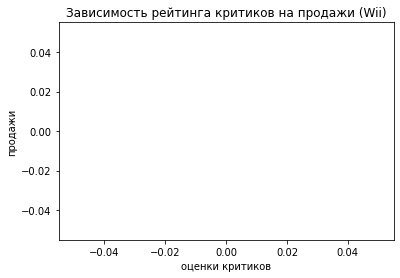

Корреляция Пирсона: nan


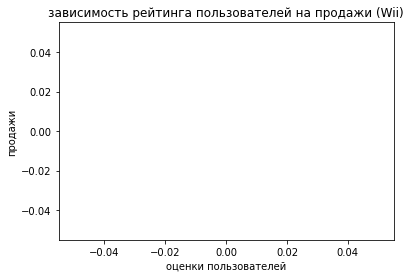

Корреляция Пирсона: nan


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales


In [31]:
wii_data = actual_data_score[actual_data_score['platform'] == 'Wii']

wii_data.plot.scatter(x='critic_score', y='sales')
plt.xlabel('оценки критиков')
plt.ylabel('продажи')
plt.title('Зависимость рейтинга критиков на продажи (Wii)')
plt.show()

print('Корреляция Пирсона:', wii_data['critic_score'].corr(wii_data['sales']) )

wii_data.plot.scatter(x='user_score', y='sales')
plt.xlabel('оценки пользователей')
plt.ylabel('продажи')
plt.title('зависимость рейтинга пользователей на продажи (Wii)')
plt.show()

print('Корреляция Пирсона:', wii_data['user_score'].corr(wii_data['sales']))

wii_data.head()

Оценки критиков у этой платформы отсутствуют, поэтому корреляцию вывести невозможно.

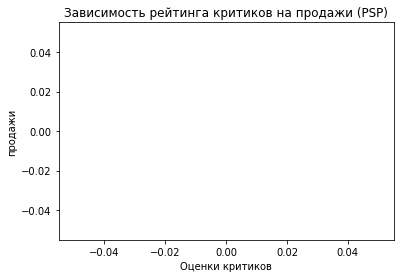

Корреляция Пирсона: nan


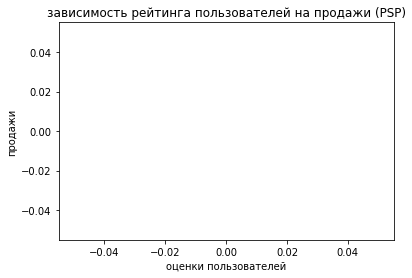

Корреляция Пирсона: nan


In [32]:
psp_data = actual_data_score[actual_data_score['platform'] == 'PSP']

psp_data.plot.scatter(x='critic_score', y='sales')
plt.xlabel('Оценки критиков')
plt.ylabel('продажи')
plt.title('Зависимость рейтинга критиков на продажи (PSP)')
plt.show()

print('Корреляция Пирсона:', psp_data['critic_score'].corr(psp_data['sales']) )

wii_data.plot.scatter(x='user_score', y='sales')
plt.xlabel('оценки пользователей')
plt.ylabel('продажи')
plt.title('зависимость рейтинга пользователей на продажи (PSP)')
plt.show()

print('Корреляция Пирсона:', psp_data['user_score'].corr(psp_data['sales']))

У платформы PSP отсутствуют оценки как критиков, так и пользователей, поэтому зависимость вывести невозможно.

**Вывод** У всех платформ, где достаточно оценок есть умеренная зависимость от оценок критиков и нет или очень слабая от оценок пользователей. Значит отправлять новые игры критикам на обзор полезно для их успешных продаж

**3.9 Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**

,sales
genre,
Shooter,1.335469
Sports,0.680000
Platform,0.476053
Fighting,0.470333
Role-Playing,0.459005


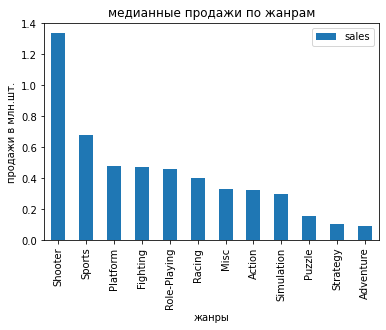

In [33]:
genre_pivot_table = actual_data.pivot_table(index='genre', values='sales', aggfunc='mean')
genre_pivot_table = genre_pivot_table.sort_values(by='sales', ascending=False)
genre_pivot_table.plot(kind='bar', title='медианные продажи по жанрам', xlabel='жанры', ylabel='продажи в млн.шт.')
genre_pivot_table.head()


**вывод** Самые успешные продажи у шутеров (shooter),в 2 раза меньшу у sports, далее platform, Fighting и Role-playing на одном уровне, чуть ниже racing.

**Шаг 4. Составьте портрет пользователя каждого региона**

 Определите для пользователя каждого региона (NA, EU, JP):

4.1 Самые популярные платформы (топ-5). Опишите различия в долях продаж.

4.2 Самые популярные жанры (топ-5). Поясните разницу.

4.3 Влияет ли рейтинг ESRB на продажи в отдельном регионе?

**Определим портрет пользователя Северной Америки** 

узнаем самые популярные платформы

<AxesSubplot:title={'center':'популярные платформы в Северной Америке'}, ylabel='na_sales'>

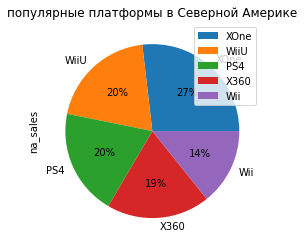

In [34]:
platform_na = actual_data.pivot_table(index='platform', values='na_sales', aggfunc='mean')
platform_na = platform_na.sort_values('na_sales', ascending=False)
platform_na_top = platform_na.head(5)
#platform_na_top['other'] = sum[platform_na['3DS','PS3', 'PS', 'PSV','PSP']] 
platform_na_top.plot(kind='pie', title='популярные платформы в Северной Америке', y='na_sales', autopct='%1.0f%%', )

Узнаем самые популярные жанры

<AxesSubplot:title={'center':'популярные жанры у пользователей Северной Америки'}, ylabel='na_sales'>

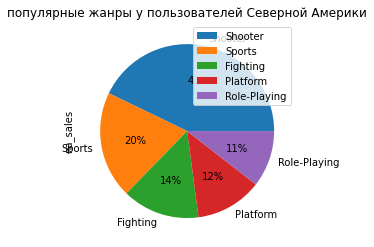

In [35]:
genre_na = actual_data.pivot_table(index='genre', values='na_sales', aggfunc='mean').sort_values('na_sales', ascending=False)
genre_na_top = genre_na.head(5)

genre_na_top.plot(kind='pie', title = 'популярные жанры у пользователей Северной Америки', y='na_sales', autopct='%1.0f%%')

Влияет ли рейтинг ESRB на продажи в Северной Америке

<AxesSubplot:title={'center':'Продажи по  рейтингам в Северной Америке'}, ylabel='na_sales'>

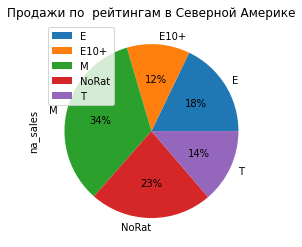

In [36]:
rating_na = actual_data.pivot_table(index='rating', values='na_sales', aggfunc='sum')
rating_na.plot(kind='pie', y='na_sales', title='Продажи по  рейтингам в Северной Америке', autopct='%1.0f%%')

**Портрет пользователя из Северной Америки: у него самые популярные платформы - PS4 и XOne, жанры - shooter(43%), sports(20%), fighting - 14%, platform и role-plaining по 12 и 11%, больше всего продаётся игр с рейтингом ESRB - M (Подходит для лиц старше 17 лет) - 34% и без рейтинга - 21%, E - 18%, Т - 14% и Е10+ - 12%**

**Составим портрет пользователя Евросоюза

<AxesSubplot:title={'center':'продажи платформ у пользователей Европы'}, ylabel='eu_sales'>

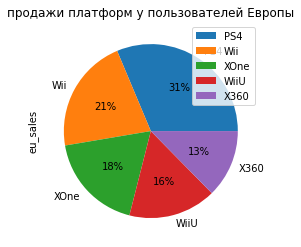

In [37]:
platform_eu = actual_data.pivot_table(index='platform', values='eu_sales', aggfunc='mean')
platform_eu = platform_eu.sort_values('eu_sales', ascending=False)
platform_eu_top = platform_eu.head(5)
platform_eu_top.plot(kind='pie', title = 'продажи платформ у пользователей Европы', y='eu_sales', autopct='%1.0f%%')

<AxesSubplot:title={'center':'популярные жанры у пользователей Европы'}, ylabel='eu_sales'>

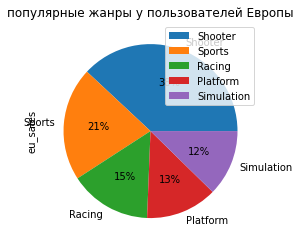

In [38]:
#график по жанрам
platform_eu = actual_data.pivot_table(index='genre', values='eu_sales', aggfunc='mean')
platform_eu = platform_eu.sort_values('eu_sales', ascending=False)
platform_eu_top = platform_eu.head(5)
platform_eu_top.plot(kind='pie', title = 'популярные жанры у пользователей Европы', y='eu_sales', autopct='%1.0f%%')

<AxesSubplot:title={'center':'Продажи по рейтингу в Европе'}, ylabel='eu_sales'>

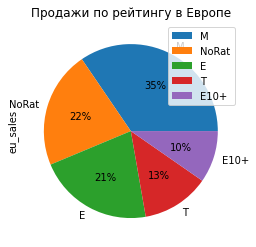

In [39]:
rating_eu = actual_data.pivot_table(index='rating', values='eu_sales', aggfunc='sum')
rating_eu = rating_eu.sort_values('eu_sales', ascending=False)
rating_eu_top = rating_eu.head(5)
rating_eu.plot(kind='pie', y='eu_sales', title='Продажи по рейтингу в Европе', autopct='%1.0f%%')


**Портрет европейского пользователя: Пользуется в основном PS4 (55%), 20% пользователей XOne, остальные представлены совсем по маленьку, на первом месте по продажам жанры - shooter(36%), на втором -  - sports(21%), 3 - rasing(15%). Преобладают игры с рейтингом M(с 17 лет) - 35%, E (для всех возрастных категорий) и игры без рейтинга составляют по 21-22%, Т и Е10+ представлены почти одинаково по 13 и 10%**

**Составим портрет пользователя JP**

<AxesSubplot:title={'center':'продажи платформ у пользователей Японии'}, ylabel='jp_sales'>

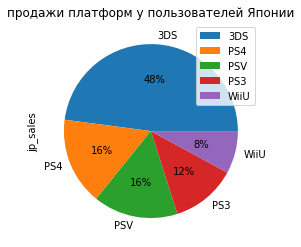

In [40]:
platform_jp = actual_data.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
platform_jp = platform_jp.sort_values('jp_sales', ascending=False)
platform_jp_top = platform_jp.head(5)
platform_jp_top.plot(kind='pie', title = 'продажи платформ у пользователей Японии', y='jp_sales', autopct='%1.0f%%')

<AxesSubplot:title={'center':'популярные жанры у пользователей Японии'}, ylabel='jp_sales'>

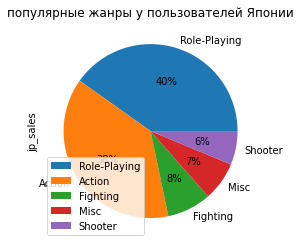

In [41]:
genre_jp = actual_data.pivot_table(index='genre', values='jp_sales', aggfunc='sum')
genre_jp = genre_jp.sort_values('jp_sales', ascending=False)
genre_jp_top = genre_jp.head(5)
genre_jp_top.plot(kind='pie', title = 'популярные жанры у пользователей Японии', y='jp_sales', autopct='%1.0f%%')

<AxesSubplot:title={'center':'Продажи по рейтингу в Японии'}, ylabel='jp_sales'>

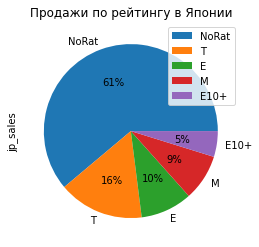

In [42]:
rating_jp = actual_data.pivot_table(index='rating', values='jp_sales', aggfunc='sum')
rating_jp = rating_jp.sort_values('jp_sales', ascending=False)
rating_jp_top = rating_jp.head(5)
rating_jp.plot(kind='pie', y='jp_sales', title='Продажи по рейтингу в Японии', autopct='%1.0f%%')


**Японский пользователь совершенно другой: преимущественная популярность платформы 3DS (48%), любимые жанры - 40% role-playing и 39% action, остальные совсем мало представлены (6-8%), 61% игр без рейтинга (возможно это самые новинки, которые еще его не получили) 

**Вывод** Американский, Европейский и Японский рынки очень разные, для прогнозирования продаж по каждому рынку следует ориентироваться на портреты пользователей по регионам - \
для Америки платформы - PS4 и XOne, жанры - shooter(43%), sports(20%), fighting - 14%, platform и role-plaining по 12 и 11%, больше всего продаётся игр с рейтингом ESRB - M (Подходит для лиц старше 17 лет) - 34% и без рейтинга - 21%, E - 18%, Т - 14% и Е10+ - 12%

для Европейских пользователей - PS4 (55%), 20% пользователей XOne, остальные представлены совсем по маленьку, на первом месте по продажам жанры - shooter(36%), на втором -  - sports(21%), 3 - rasing(15%). Преобладают игры с рейтингом M(с 17 лет) - 35%, E (для всех возрастных категорий) и игры без рейтинга составляют по 21-22%, Т и Е10+ представлены почти одинаково по 13 и 10%**/

для Японских - платформы 3DS (48%), любимые жанры - 40% role-playing и 39% action, остальные совсем мало представлены (6-8%), 61% игр без рейтинга (возможно это самые новинки, которые еще его не получили) 

**Шаг 5. Проверьте гипотезы**

5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

5.2 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.\
Задайте самостоятельно пороговое значение alpha.

Поясните:

Как вы сформулировали нулевую и альтернативную гипотезы;

Какой критерий применили для проверки гипотез и почему.

**Проверим гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые
Н0: Средние рейтинги одинаковы mu1=mu2
Н1: Средние рейтинги разные mu1<>mu2

In [43]:
# Создаем датафреймы только с нужными платформами
xbox_data = actual_data[actual_data['platform'] == 'XOne']
pc_data = actual_data[actual_data['platform'] == 'PC']

# Удаляем пропущенные значения 
xbox_data = xbox_data['user_score'].dropna()
pc_data = pc_data['user_score'].dropna()
print('средний пользовательский рейтинг Xbox:', xbox_data.mean())
print('средний пользовательский рейтинг PC:', pc_data.mean())


alpha = 0.05

# Проводим T-тест
results = st.ttest_ind(xbox_data, pc_data, equal_var=False)

print('Р-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем гипотезу, что средние рейтинги одинаковы')
else:
    print('Не получилось отвергнуть гипотезу, средние рейтинги могут быть равны')

средний пользовательский рейтинг Xbox: 6.594545454545456
средний пользовательский рейтинг PC: 6.298360655737705
Р-значение: 0.11601398086668832
Не получилось отвергнуть гипотезу, средние рейтинги могут быть равны


**Вывод: гипотеза, что средние пользовательские рейтинги Xbox One и PC равны не отвергнута

Проверим гипотезу, что средние пользовательские рейтинги жанров Action и Sports разные.
H0: Средние пользовательские рейтинги жанров Action и Sports не равны mu1 != mu2
H1: Средние пользовательские рейтинги жанров Action и Sports равны mu1=mu2

In [44]:
# Создаем датафреймы только с нужными платформами
action_data = actual_data[actual_data['genre'] == 'Action']
sports_data = actual_data[actual_data['genre'] == 'Sports']

# Удаляем пропущенные значения
action_data = action_data['user_score'].dropna()
sports_data = sports_data['user_score'].dropna()
print('Средний пользовательский рейтинг жанра Action:',action_data.mean())
print('Средний пользовательский рейтинг жанра Sports:',sports_data.mean())

alpha = 0.05

# Проводим T-тест
results = st.ttest_ind(action_data, sports_data, equal_var=False)

print('Р-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Не получилось отвергнуть гипотезу, что средние рейтинги не равны')
else:
    print('Отвергаем гипотезу, средние рейтинги разные')

Средний пользовательский рейтинг жанра Action: 6.760606060606061
Средний пользовательский рейтинг жанра Sports: 5.2251968503937
Р-значение: 1.1825550382644557e-14
Не получилось отвергнуть гипотезу, что средние рейтинги не равны


**Вывод: средние рейтинги по жанрам ЭКШН и СПОРТ скорее всего не равны.

# общий вывод

Мы провели исследование по данным о компьютерных играх за период с 1984 по 2016 год.
1. Проверили на пропуски, удалили ненужные строки
2. проверили на явные и неявные дубликаты, удалили неявные
3. Поменяли тип данные в столбцах, заменили значения tbd на числовой NaN
4.  Провели исследовательский анализ данных:
Увидели, что данные за период до 2002 нам не важны вообще - отрасль была совсем другой с совсем другими продажами и играми.
Мы посмотрите, как менялись продажи по платформам. Выбрали платформы с наибольшими суммарными продажами, в среднем платформы живут 5-7 лет. 
Мы взяли актуальный период с 2014 по 2016 год - за этот период платформы, которые показывают хороший резуьтат, продолжат работу и в следующем году, а те, чей жизненный цикл заканчивается, умрут, И мы не будем наблюдать за лишними отжившими своё платформами.

Мы увидели, что платформы к концу 2016 года все упали в продажах. Потенциально прибыльные еще остаются PS4 (69,25), XOne(26,5) и 3DS(15,14млн.шт. продаж за 2016 год), все остальные сдали свои позиции, на них не стоит делать ставки.

Мы построили график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Увидели, что  медианные значения продаж у платформ Wii, WiiU, X360, XOne, PS4 - около 0,2 млн.шт, у PS3 - 0,1 ,PC - 0,09 , 3DS - 0,08. PSP и PSV маленькие распределения и медианы на 0,01 и 0,02 млн шт за выбранный период.

 мы посмотрели, как влияют на продажи  отзывы по платформам пользователей и критиков, мы построили диаграмму рассеяния и посчитали корреляцию между отзывами и продажами. Корреляция с отзывами критиков - в основном зависимость 0,44-0,42 - умеренная, корреляция с отзывами пользователей почти везде отсутмтвует, кроме платформы WiiU - у нее она 0,42. 
 Рекомендуем отправлять критикам все новые игры, выходящие на всех платформах.

Мы посмотрели на общее распределение игр по жанрам. Выделяются 5 жанров Shooter	1.335 млн.шт проданных, Sports - 0.68 млн.шт, Platform	0.476 млн.шт., Fighting	0.470 млн.шт. , Role-Playing	0.459 млн.шт. Шутеры явные лидеры рынка.

Мы составили портреты пользователей \
 Американский, Европейский и Японский рынки очень разные, для прогнозирования продаж по каждому рынку следует ориентироваться на портреты пользователей по регионам -
для Америки платформы - PS4 и XOne, жанры - shooter(43%), sports(20%), fighting - 14%, platform и role-plaining по 12 и 11%, больше всего продаётся игр с рейтингом ESRB - M (Подходит для лиц старше 17 лет) - 34% и без рейтинга - 21%, E - 18%, Т - 14% и Е10+ - 12%

для Европейских пользователей - PS4 (55%), 20% пользователей XOne, остальные представлены совсем по маленьку, на первом месте по продажам жанры - shooter(36%), на втором - - sports(21%), 3 - rasing(15%). Преобладают игры с рейтингом M(с 17 лет) - 35%, E (для всех возрастных категорий) и игры без рейтинга составляют по 21-22%, Т и Е10+ представлены почти одинаково по 13 и 10%**/

для Японских - платформы 3DS (48%), любимые жанры - 40% role-playing и 39% action, остальные совсем мало представлены (6-8%), 61% игр без рейтинга (возможно это самые новинки, которые еще его не получили)

Мы проверили гипотезы, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Гипотезу не опровергли.
Проверили  гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Гипотезу не смогли отвернуть. 
